In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graficar(tabla, metodo='jacobi', x='tamaño', y='tiempo_promedio', plataformas=['cuda', 'opencl', 'numpy']):
    colores = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    
    for indice, plataforma in enumerate(plataformas):
        color = colores[indice]
        tabla_plataforma = tabla.loc[tabla['plataforma'] == plataforma]
        tabla_metodo = tabla_plataforma.loc[tabla_plataforma['metodo'] == metodo]
        x_plataforma = tabla_metodo[x].values
        y_plataforma = tabla_metodo[y].values
        plt.plot(x_plataforma, y_plataforma, color=color, label=plataforma)
    plt.title(y + ' vs ' + x + ' en ' + metodo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
archivo_resultados = pd.read_excel('resultados.xlsx')
archivo_resultados.head()

,platform,method,size,iterations,time,error
0,cuda,jacobi,1000,4,1.313646,3.560363e-06
1,cuda,GD,1000,9,0.248771,7.942461e-05
2,cuda,CG,1000,10,0.174920,5.567034e-07
3,opencl,jacobi,1000,1,0.141628,NaN
4,opencl,GD,1000,9,0.051960,7.942625e-05


In [4]:
def describir(tabla):
    promedio = tabla.mean()
    std = tabla.std()
    return [promedio, std]

plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'iteraciones_promedio', 'std_iteraciones',
            'tiempo_promedio', 'std_tiempo', 'error_promedio', 'std_error']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_iteraciones = describir(tabla['iterations'])
            descripcion_tiempo = describir(tabla['time'])
            descripcion_error = describir(tabla['error'])
            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_iteraciones + descripcion_tiempo + descripcion_error]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,iteraciones_promedio,std_iteraciones,tiempo_promedio,std_tiempo,error_promedio,std_error
0,cuda,jacobi,1000,4.0,0.0,0.174557,0.400237,3.456458e-06,1.840301e-07
1,cuda,jacobi,2000,4.0,0.0,0.067396,0.002444,8.974259e-07,3.720462e-08
2,cuda,jacobi,3000,3.0,0.0,0.073494,0.002132,1.690734e-05,5.376921e-07
3,cuda,jacobi,4000,3.0,0.0,0.103714,0.002967,1.099155e-05,1.734492e-07
4,cuda,jacobi,5000,3.0,0.0,0.139109,0.002585,7.842707e-06,1.817470e-07


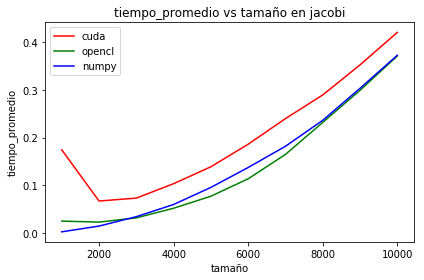

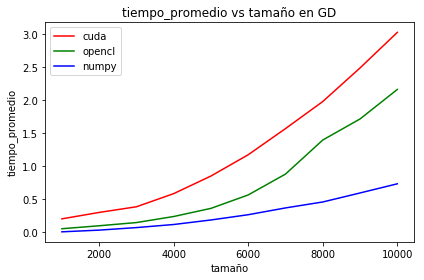

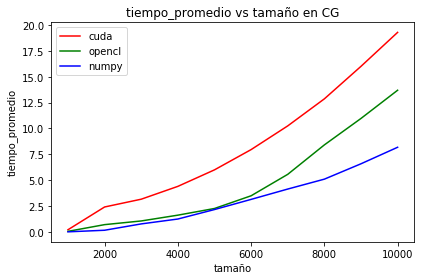

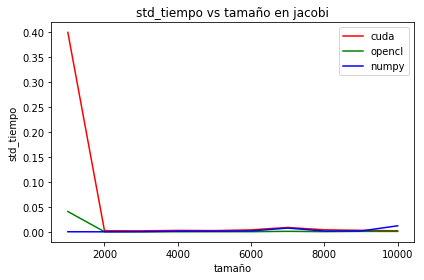

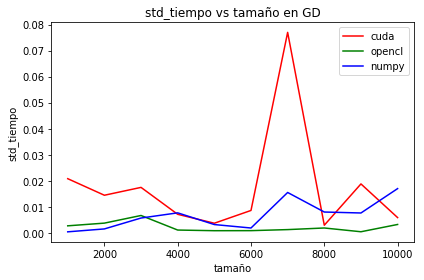

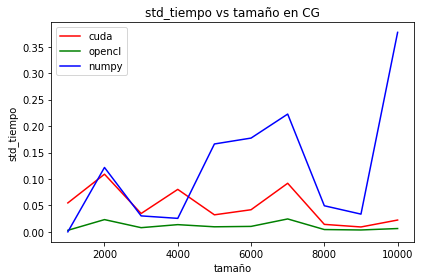

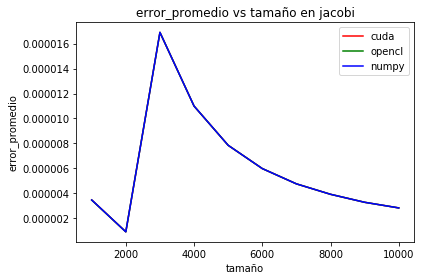

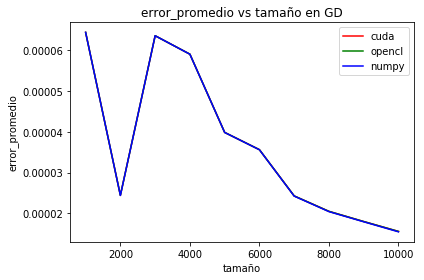

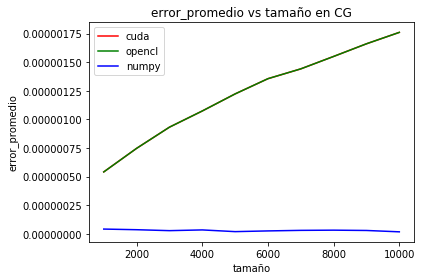

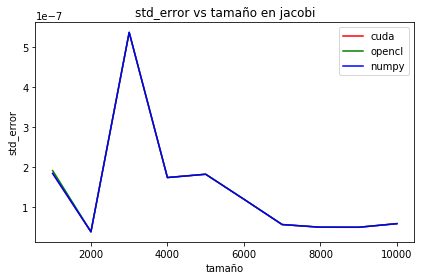

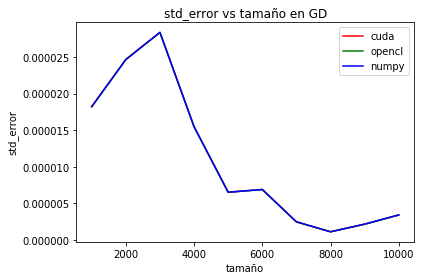

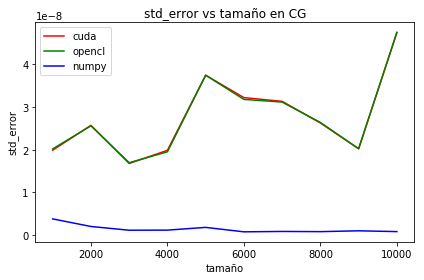

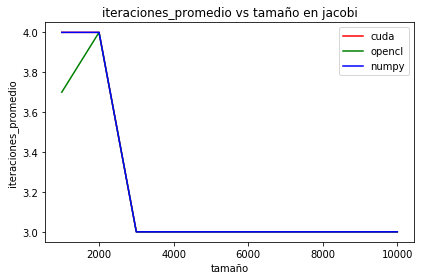

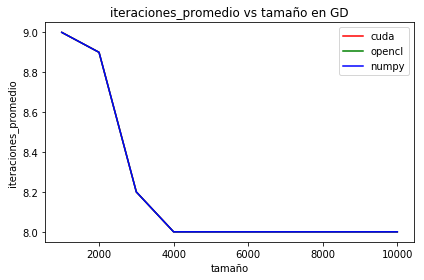

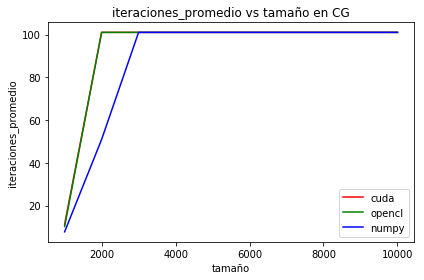

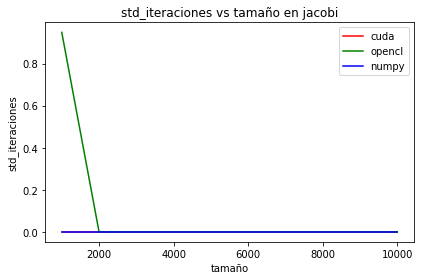

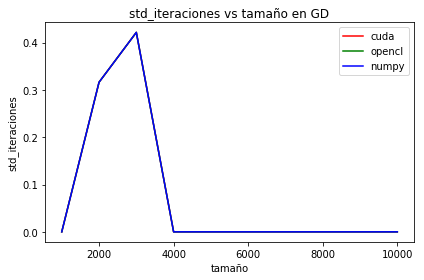

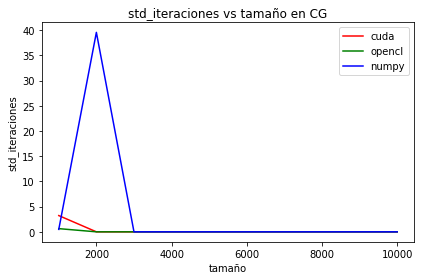

In [5]:
ys = ['tiempo_promedio', 'std_tiempo', 'error_promedio', 'std_error', 'iteraciones_promedio', 'std_iteraciones']
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y)